<a href="https://colab.research.google.com/github/ChandrashekharGhanokar/car_price_prediction/blob/main/car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv('/content/quikr_car.csv')

#Data Preprocessing

In [3]:
# shape of a data
df.shape

(892, 6)

In [4]:
# fist five rows of dataset
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
456,Mahindra TUV300 T4 Plus,Mahindra,2016,"5,40,000","35,000 kms",Diesel
214,Mahindra Xylo E4,Mahindra,2012,"4,00,000","35,000 kms",Diesel
382,Mahindra Jeep MM 550 XDB,Mahindra,2006,"4,25,000",122 kms,Diesel
47,Datsun Redi GO S,Datsun,2017,"2,35,000","16,000 kms",Petrol
613,Mahindra KUV100 K8 D 6 STR,Mahindra,2018,Ask For Price,"7,500 kms",Diesel


In [5]:
# total columns present in dataset
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# statistical information about dataset
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [8]:
# Checking null values in the dataset
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
# Checking duplicate values in the dataset
df.duplicated().sum()

94

#Exploratory Data Analysis

In [10]:
## Calculate and display the frequency count of unique values in the 'name' column of the DataFrame 'df'
df['name'].value_counts()

Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: name, Length: 525, dtype: int64

In [11]:
# Calculate and display the frequency count of unique values in the 'company' column of the Dataframe 'df'
df['company'].value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: company, dtype: int64

In [12]:
# Get the unique values in the 'year' column of the DataFrame 'df'
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [13]:
# Filter the DataFrame 'df' to include only rows where the 'year' column contains numeric values
df=df[df['year'].str.isnumeric()]

In [14]:
# Get the unique car manufacturing years from the 'year' column of the filtered DataFrame 'df'
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [15]:
# Filter the DataFrame 'df' to include only rows where the 'year' column contains numeric values
df=df[df['year'].str.isnumeric()]

In [16]:
# Get the unique car manufacturing years from the 'year' column of the filtered DataFrame 'df'
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [17]:
# Convert the 'year' column in the DataFrame 'df' to integer data type
df['year']=df['year'].astype('int')

In [18]:
# Display information about the DataFrame 'df' after data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [19]:
# Get the unique prices from the 'Price' column of the DataFrame 'df'
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [20]:
# Filter the DataFrame 'df' to exclude rows where the 'Price' column equals 'Ask For Price'
df=df[df['Price']!='Ask For Price']

In [21]:
# Remove commas from the 'Price' column and convert it to an integer data type
df['Price']=df['Price'].str.replace(',','').astype('int')

In [22]:
# Display information about the DataFrame 'df' after converting the 'Price' column to integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [23]:
# Get the unique values in the 'kms_driven' column of the DataFrame 'df'
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [24]:
# Filter the DataFrame 'df' to exclude rows where the 'kms_driven' column equals 'Petrol'
df=df[df['kms_driven']!='Petrol']

In [25]:
# Remove the 'kms' units from the 'kms_driven' column
df['kms_driven']=df['kms_driven'].str.replace('kms','')

In [26]:
# Remove commas from the 'kms_driven' column and convert it to an integer data type
df['kms_driven']=df['kms_driven'].str.replace(',','').astype('int')

In [27]:
# Display information about the DataFrame 'df' after converting the 'kms_driven' column to integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [28]:
# Calculate and display the frequency count of unique values in the 'fuel_type' column of the DataFrame 'df'
df['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [29]:
# Filter the DataFrame 'df' to exclude rows where the 'fuel_type' column contains missing values (NaN)
df=df[~df['fuel_type'].isna()]

In [30]:
# Display information about the DataFrame 'df' after filtering out rows with missing 'fuel_type' values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [31]:
# Get the shape (dimensions) of the DataFrame 'df'
df.shape

(816, 6)

In [32]:
# Display the first few rows of the DataFrame 'df'
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [33]:
# Modify the 'name' column by splitting it into words, selecting the first three words, and joining them back together
df['name']=df['name'].str.split(' ').str[0:3].str.join(' ')

In [34]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [35]:
# Reset the DataFrame index and drop the previous index
df=df.reset_index(drop=True)

In [36]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


#Feature Engineering

In [37]:
df.shape

(816, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [39]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


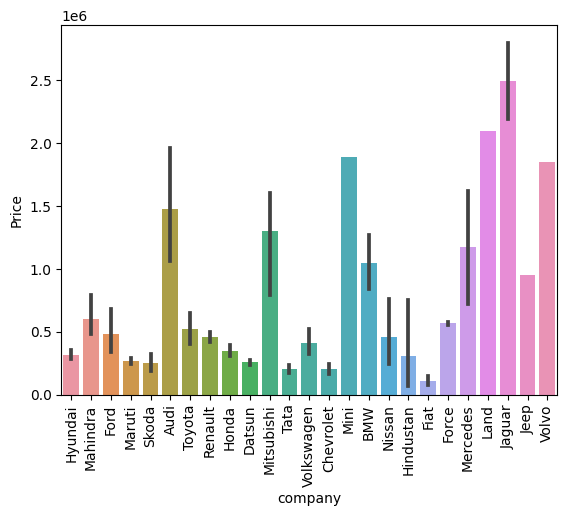

In [40]:
# Create a bar plot using Seaborn to visualize the relationship between 'company' and 'Price'
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

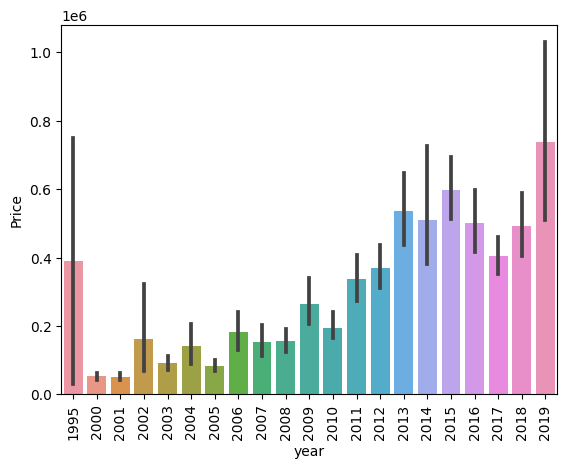

In [41]:
# Create a bar plot using Seaborn to visualize the relationship between 'year' and 'Price'
sns.barplot(x=df['year'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

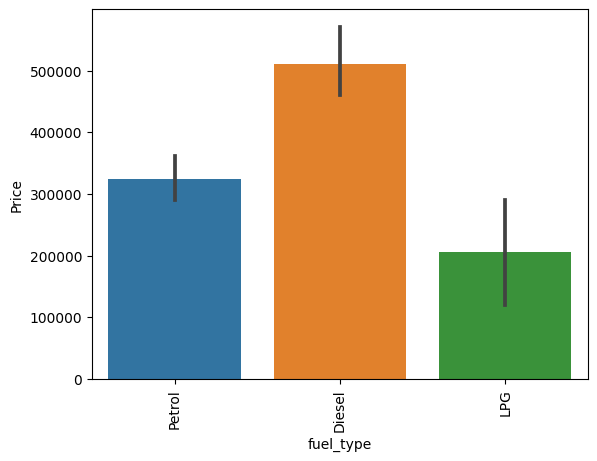

In [42]:
# Create a bar plot using Seaborn to visualize the relationship between 'fuel_type' and 'Price'
sns.barplot(x=df['fuel_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='kms_driven', ylabel='Price'>

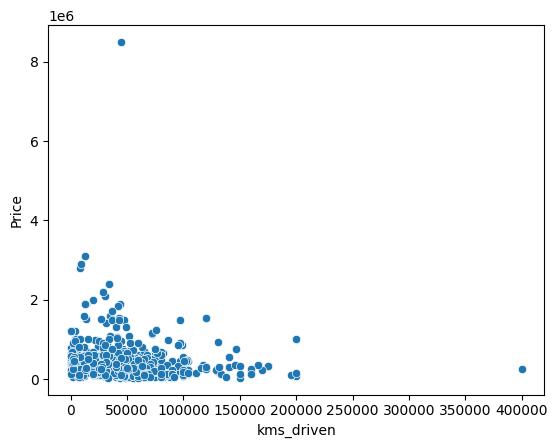

In [43]:
# Create a scatter plot using Seaborn to visualize the relationship between 'kms_driven' and 'Price'
sns.scatterplot(x=df['kms_driven'],y=df['Price'])

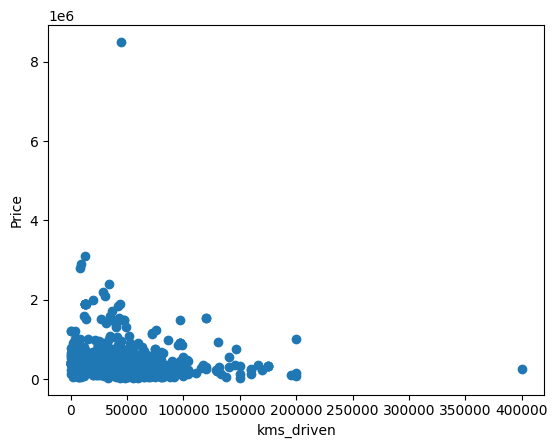

In [44]:
# Create a scatter plot using Matplotlib to visualize the relationship between 'kms_driven' and 'Price'
plt.scatter(x=df['kms_driven'],y=df['Price'])
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

#Model Selection

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [46]:
# Create a new DataFrame 'x' by removing the 'Price' column
x=df.drop(columns=['Price'])

In [47]:
# Create a new variable 'y' by selecting the 'Price' column from the DataFrame 'df'
y=df['Price']

In [48]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [49]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 816, dtype: int64

In [50]:
# Import the train_test_split function from scikit-learn for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

In [51]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [52]:
x_train

,name,company,year,kms_driven,fuel_type
589,Tata Sumo Gold,Tata,2012,75000,Diesel
379,Tata Indigo LX,Tata,2016,104000,Diesel
612,Hyundai Santro Xing,Hyundai,2014,57000,Petrol
744,Chevrolet Beat LS,Chevrolet,2014,31000,Diesel
603,Maruti Suzuki Swift,Maruti,2012,48006,Diesel
...,...,...,...,...,...
534,Mahindra XUV500 W6,Mahindra,2014,45000,Diesel
584,Skoda Octavia Classic,Skoda,2006,65000,Diesel
493,Maruti Suzuki Wagon,Maruti,2017,23000,Petrol
527,BMW X1 xDrive20d,BMW,2011,72000,Diesel


In [53]:
x_test

,name,company,year,kms_driven,fuel_type
396,Hyundai Grand i10,Hyundai,2016,59910,Diesel
746,Hyundai Eon D,Hyundai,2013,20000,Petrol
109,Ford Figo Diesel,Ford,2014,50000,Diesel
295,Ford EcoSport Titanium,Ford,2014,57000,Diesel
15,Audi Q7,Audi,2014,16934,Diesel
...,...,...,...,...,...
267,Maruti Suzuki Maruti,Maruti,2003,56758,Petrol
499,Mahindra Scorpio Vlx,Mahindra,2013,75000,Diesel
317,Mahindra Scorpio,Mahindra,2013,68000,Diesel
705,Honda City 1.5,Honda,2005,68000,Petrol


In [54]:
# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

In [76]:
# Import necessary modules and functions from scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [77]:
# Initialize the OneHotEncoder
ohe=OneHotEncoder()
# Fit the OneHotEncoder to the specified categorical columns
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [78]:
# Create a column transformer
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [79]:
# Initialize a Linear Regression model
lr=LinearRegression()

In [80]:
# Create a machine learning pipeline
pipe=make_pipeline(column_trans,lr)

In [81]:
# Fit the machine learning pipeline to the training data
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [82]:
# Use the trained machine learning pipeline to make predictions on the test data
y_pred=pipe.predict(x_test)

In [83]:
# Calculate the R-squared (R2) score to evaluate the model's performance
r2_score(y_test,y_pred)

0.8604602644312209

In [67]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [84]:
# Find the index of the highest R-squared score in the 'scores' list
np.argmax(scores)

247

In [85]:
# Retrieve the highest R-squared score from the 'scores' list
scores[np.argmax(scores)]

0.8604602644312209

In [86]:
# Use the trained machine learning pipeline to make predictions on a new data point
pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([455413.55294819])

In [87]:
# Train and evaluate the Linear Regression model using the best random seed
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8604602644312209

In [72]:
import pickle

In [88]:
# Save the trained Linear Regression model to a file using pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [89]:
# Use the saved Linear Regression model to make predictions on a new data point
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([455413.55294819])

In [90]:
# Use the saved Linear Regression model to make predictions on a new data point
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese